In [5]:
import argparse
import torch
import os
import numpy as np

from model.wide_res_net import WideResNet
from model.smooth_cross_entropy import smooth_crossentropy
from data.cifar import Cifar
from utility.log import Log
from utility.initialize import initialize
from utility.step_lr import StepLR
import sys; sys.path.append("..")
from sam import SAM
from utility.options import Options
from utility import dataset

import csv
from PIL import Image
%matplotlib inline
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import numpy as np

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"


csv_path = '/opt/ml/input/new_test/info.csv'
csv_path = './test.csv'
##

In [6]:
import os
os.getcwd()

'/opt/ml/code/AI_Tech/sam/example'

In [7]:
from torchvision.io import read_image
from torchvision import transforms

def get_transforms_img(im):
    # im = torchvision.transforms.Resize((224,224))(im)
    # im = torchvision.transforms.RandomHorizontalFlip()(im)
    # im = torchvision.transforms.CenterCrop((150,150))(im)

    im = transforms.Compose([
                        transforms.CenterCrop((300,300)),
                        transforms.Resize((32,32)),
                        # transforms.RandomHorizontalFlip(),
    ])(im)
    
    return im
i = 0

/opt/ml/code/AI_Tech/sam/example/weights/2_12_9296


ValueError: num must be 1 <= num <= 40, not 41

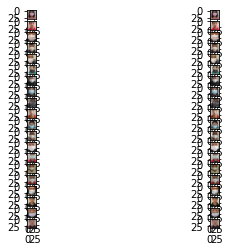

In [8]:
# opt = Options().parse()

# initialize(opt, seed=42)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# dataset = Cifar(opt.batch_size, opt.threads)
dataset = dataset.load_test_data_humpyter()
log = Log(log_each=10)
model = WideResNet(16, 16, 8, 0.0, in_channels=3, labels=18).to(device)
ckpt_path = os.path.join('/opt/ml/code/AI_Tech/sam/example/weights', '2_12_9296')
print(ckpt_path)
ckpt = torch.load(ckpt_path + '.pth')
model.load_state_dict(ckpt['state_dict'])

base_optimizer = torch.optim.SGD
optimizer = SAM(model.parameters(), base_optimizer, rho=0.5, adaptive=True, lr=0.1, momentum=0.9, weight_decay=0.0005)
scheduler = StepLR(optimizer, 0.1, 100)

# for epoch in range(opt.epochs):

model.eval()
# log.eval(len_dataset=len(dataset))
base = '/opt/ml/input/new_test/1/'

fig = plt.figure()
num = 10
rows = 20
cols = 2

with torch.no_grad():
    for i, batch in enumerate(dataset):
        inputs, targets = (b.to(device) for b in batch)
        # print(f'target: {targets}')
        fname, _ = dataset.dataset.samples[i]
        fname = fname.split("/")[-1]
        # print(fname)
        # print(inputs.shape)
        hi = inputs.cpu()
        tr = np.asarray(hi[0]).transpose((1,2,0))
        # print(tr.shape)
        # imshow(np.asarray(hi[0]).transpose((1,2,0)))

        img = read_image(base + fname)
        # print(img.shape)
        img  = get_transforms_img(img)
        rl = np.asarray(img).transpose((1,2,0))
        # print(rl.shape)
        # imshow(np.asarray(img).transpose((1,2,0)))

        pan =np.hstack([tr, rl])
        fig.add_subplot(rows, cols, 2*i+1).imshow(tr)
        fig.add_subplot(rows, cols, 2*i+2).imshow(rl)
        if i==rows:
            plt.show()
            break
        

        predictions = model(inputs)
        pp = int(torch.argmax(predictions,1))
        # print(targets.shape, pp.shape, end='')
        # print(f'[i:{i}]\t{fname.split("/")[-1]},{int(pp):>3}', end='\t')
        # print(f'[{(i+1)/12600*100: .2f}{i+1 :>7} / 12600]')
        # loss = smooth_crossentropy(predictions, targets)
        # correct = torch.argmax(predictions, 1) == targets
        # print(torch.argmax(predictions, 1))
        # log(model, loss.cpu(), correct.cpu())


In [66]:
        inputs, targets = (b.to(device) for b in batch)
        # print(f'target: {targets}')
        fname, _ = dataset.dataset.samples[i]
        fname = fname.split("/")[-1]
        print(fname)
        print(inputs.shape)
        hi = inputs.cpu()
        tr = np.asarray(hi[0]).transpose((1,2,0))
        print(tr.shape)
        # imshow(np.asarray(hi[0]).transpose((1,2,0)))

        img = read_image(base + fname)
        # print(img.shape)
        img  = get_transforms_img(img)
        rl = np.asarray(img).transpose((1,2,0))
        print(rl.shape)
        # imshow(np.asarray(img).transpose((1,2,0)))

        pan =np.hstack([tr, rl])
        ax1.imshow(tr)
        ax2.imshow(rl)
        plt.show()
        

        predictions = model(inputs)
        pp = int(torch.argmax(predictions,1))
        # print(targets.shape, pp.shape, end='')
        print(f'[i:{i}]\t{fname.split("/")[-1]},{int(pp):>3}', end='\t')
        print(f'[{(i+1)/12600*100: .2f}{i+1 :>7} / 12600]')
        # loss = smooth_crossentropy(predictions, targets)
        # correct = torch.argmax(predictions, 1) == targets
        # print(torch.argmax(predictions, 1))
        # log(model, loss.cpu(), correct.cpu())

AttributeError: module 'utility.dataset' has no attribute 'dataset'

torch.Size([3, 512, 384])


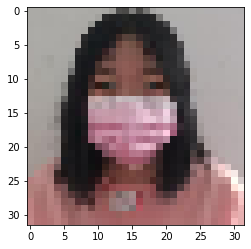

In [13]:
base = '/opt/ml/input/new_test/1/0001b62fb1057a1182db2c839de232dbef0d1e90.jpg'
img = read_image(base)
print(img.shape)
img = get_transforms_img(img)
imshow(np.asarray(img).transpose((1,2,0)))